In [1]:
from parrot import *

In [2]:
index_collection(
    collection = "TrecCollection",
    process = 16,
    store_doc_vector = True,
    store_raw_doc = True,
    input = "/trec/disk3/AP/"
    output = "/trec/index/ap90"
)

#docs: 78583
#terms: 175559
time used: 26s


In [3]:
ap90 = datasets.ap90.load("/trec/index/ap90") 
print(ap90) 

#docs: 78583
#queries: 50


In [4]:
class MyBM25Model(Model):
    def __init__(self, k1 = 1.2, b = 0.75):
        self.k1 = k1; self.b = b
    
    def pre_compute(self, df, ctf, ctn, C, N):
        self.avgdl =  C / N
        self.idf = log(1 + (N - df + 0.5) / (df + 0.5))
        
    def score_term(self, tf, ctn, dl):
        b = self.b; k1 = self.k1 
        tf_part = tf * (k1 + 1) / (tf + k1 * (1 - b + b * dl / self.avgdl))
        return tf_part * self.idf

result_list = []
print("b","\t", "MAP")
for k in frange(0, 1, 0.1):
    model = MyBM25Model(k1 = 1.2, b = k)
    result = model.run(dataset = ap90) 
    print(b, "\t", run.avgPrec())
    result_list.append(result)

b 	 MAP
0 	 0.23788419308923295
0.1 	 0.24153463457444724
0.2 	 0.2437882749840369
0.3 	 0.2457261206151248
0.4 	 0.24786749737277464
0.5 	 0.2486832922628557
0.6 	 0.2534309953775126
0.7 	 0.24993302372372256
0.8 	 0.2456602631270451
0.9 	 0.24462936342688196
1 	 0.2409866166717072


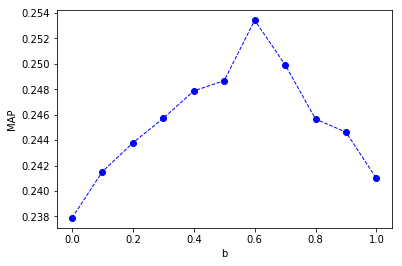

In [5]:
plot_single_trend(x_list = b_list, y_list = map_list, xlabel="b", ylabel="MAP")

In [6]:
explain_case(result = result_list[0], doc = 0)